<a href="https://colab.research.google.com/github/Madina1219/casa0018/blob/main/Week3/CASA0018_3_3_Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training with a Larger Dataset - Cats and Dogs

> This lab is loosely based on one of the TensorFlow ‘Zero to Hero’ tutorials to create a model to recognize images of cats and dogs based on a previous Kaggle competition. There is a supporting video at: https://youtu.be/nq7_ZYJPWf0?t=141


Overfitting can be a problem when training on a small dataset. Overfitting means the network 'learns' the training dataset and therefore performs poorly when subjected to unseen data. In this lab you'll look at a real dataset and see the effects of overfitting and how to combat it. The training data set can be found in the following folder:

https://liveuclac-my.sharepoint.com/:f:/g/personal/ucfnmld_ucl_ac_uk/IgAhkP-D4Q_rRJKpJdJrmXK8AaSt67_3TvTCvAAEfjPO2yk


Download the zip file to your laptop. Then use the left hand panel of colab to upload the zip file to the 'tmp' directory - the upload may take a minute or two so be patient.

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

First perform some clean up from previous runs

In [4]:
!rm -r /tmp/cats-v-dogs
!rm -r /tmp/PetImages
!rm -f /tmp/model.keras

rm: cannot remove '/tmp/cats-v-dogs': No such file or directory
rm: cannot remove '/tmp/PetImages': No such file or directory


In [11]:
from pathlib import Path
local_zip = '/tmp/cats-and-dogs.zip'
zip_file = Path(local_zip)
if zip_file.is_file():
  zip_ref   = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()


In [12]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 5200
# 5200

5200
5200


In [13]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


In [15]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 4160
# 4160
# 1040
# 1040

4160
4160
1040
1040


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='binary',
                                                              batch_size=32,
                                                              target_size=(150, 150))

# Expected Output:
# Found 8320 images belonging to 2 classes.
# Found 2080 images belonging to 2 classes.

Found 8320 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


In [18]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


260/260 ━━━━━━━━━━━━━━━━━━━━ 25s 75ms/step - acc: 0.5689 - loss: 0.6644 - val_acc: 0.7183 - val_loss: 0.5374
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.7489 - loss: 0.5163 - val_acc: 0.7750 - val_loss: 0.4744
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - acc: 0.7895 - loss: 0.4424 - val_acc: 0.8048 - val_loss: 0.4281
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - acc: 0.8227 - loss: 0.3812 - val_acc: 0.8087 - val_loss: 0.4126
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - acc: 0.8523 - loss: 0.3298 - val_acc: 0.8168 - val_loss: 0.4551
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - acc: 0.8834 - loss: 0.2726 - val_acc: 0.8067 - val_loss: 0.4412
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - acc: 0.9115 - loss: 0.2097 - val_acc: 0.8159 - val_loss: 0.4298
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.9391 - loss: 0.1540 - val_acc: 0.8197 - val_loss: 0.5154
Epoch 9/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/st

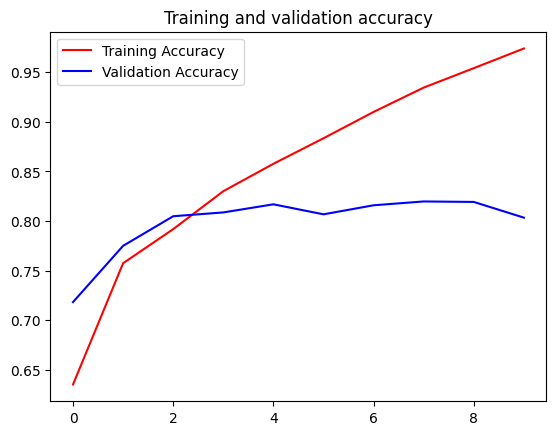

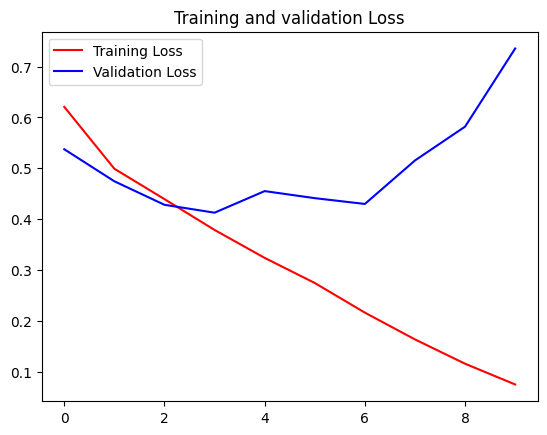

<Figure size 640x480 with 0 Axes>

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

If you inspect the Accuracy and Loss curves you will probably notice evidence of *overfitting* (where the network learns the training data set). You will notice that the training accuracy is too high and significantly better than the validation accuracy. And if you look at the loss curves the validation loss maybe increasing as the training progresses.

Use the following code to test out the model on a few images of cats and dogs that you have downloaded from the internet.


In [22]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 76.jpg to 76.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1.]
[[1.]]
76.jpg is a dog


You may well find the model performs poorly at classifying images that it has not seen before - in other words it does not 'generalise' well, which is a classic sympton of model overfit.

To combat this overfitting we can adopt a number of measures, particularly data augmentation (to diversify the training data set) and regularisation (randomly dropping some connections for each training iteration). This should reduce the overfitting and increase the ability of the network to generalise (accurately classify unseen data).

The code below illustrates a modified model architecture that should be more resistant to overfitting.

In [23]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

Now we will add some data augmentation

In [24]:
train_datagen_2 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator_2 = train_datagen_2.flow_from_directory(TRAINING_DIR, class_mode='binary', batch_size=32, target_size=(150, 150))


validation_datagen_2 = ImageDataGenerator(rescale=1.0/255.)
validation_generator_2 = validation_datagen.flow_from_directory(VALIDATION_DIR, class_mode='binary', batch_size=32, target_size=(150, 150))

Found 8320 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


Now train the new model. This may take a long time if you do not get allocated a GPU. Instead you can skip a [few steps](#scrollTo=45MhQH21bsBT&line=4&uniqifier=1) and use a model I trained earlier

In [25]:
history_2 = model_2.fit(train_generator_2, epochs=50, validation_data=validation_generator_2)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 68s 232ms/step - acc: 0.5109 - loss: 1.8500 - val_acc: 0.5832 - val_loss: 0.6801
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 59s 227ms/step - acc: 0.5686 - loss: 0.6690 - val_acc: 0.6038 - val_loss: 0.6467
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 58s 223ms/step - acc: 0.6105 - loss: 0.6511 - val_acc: 0.6394 - val_loss: 0.6159
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 59s 225ms/step - acc: 0.6264 - loss: 0.6350 - val_acc: 0.7043 - val_loss: 0.5605
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 60s 229ms/step - acc: 0.6826 - loss: 0.5952 - val_acc: 0.7274 - val_loss: 0.5420
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 59s 228ms/step - acc: 0.7121 - loss: 0.5583 - val_acc: 0.7635 - val_loss: 0.5004
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 59s 228ms/step - acc: 0.7419 - loss: 0.5282 - val_acc: 0.7683 - val_loss: 0.4771
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 59s 225ms/step - acc: 0.7655 - loss: 0.4931 - val_acc: 0.7923 - val_loss: 0.4537
Epoch 9/50
260/260 ━━━━━━━━━━━━━

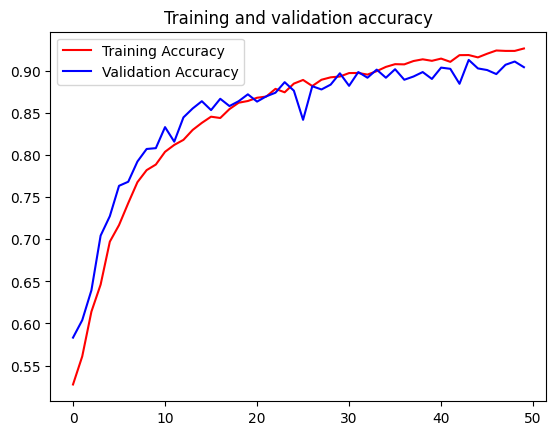

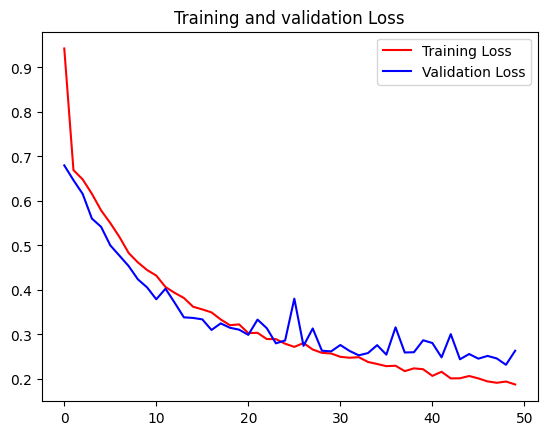

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_2.history['acc']
val_acc=history_2.history['val_acc']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.savefig('foo.png')


In [31]:
model_2.save("/tmp/model.keras")

If you haven't got time to train the model, then you can upload a model I trained earlier using a GPU. This can be found at:

https://liveuclac-my.sharepoint.com/:f:/g/personal/ucfnmld_ucl_ac_uk/IgAhkP-D4Q_rRJKpJdJrmXK8AaSt67_3TvTCvAAEfjPO2yk


Upload the model to the 'tmp' folder as before.

In [34]:
model_2 = tf.keras.models.load_model('/tmp/model.keras', compile=False)

In [33]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_2.predict(images, batch_size=10)
  print(classes[0])
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 152.jpg to 152.jpg
Saving 154.jpg to 154.jpg
Saving 155.jpg to 155.jpg
Saving 156.jpg to 156.jpg
Saving 158.jpg to 158.jpg
Saving 159.jpg to 159.jpg
Saving 161.jpg to 161.jpg
Saving 162.jpg to 162.jpg
Saving 164.jpg to 164.jpg
Saving 165.jpg to 165.jpg
Saving 166.jpg to 166.jpg
Saving 167.jpg to 167.jpg
Saving 168.jpg to 168.jpg
Saving 169.jpg to 169.jpg
Saving 170.jpg to 170.jpg
Saving 171.jpg to 171.jpg
Saving 175.jpg to 175.jpg
Saving 176.jpg to 176.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
[1.]
[[1.]]
152.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[1.]
[[1.]]
154.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1.]
[[1.]]
155.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.]
[[1.]]
156.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1.]
[[1.]]
158.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[1.]
[[1.]]
159.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[1.]
[[1.]]
161.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.]
[[1.]]
162.jpg is a